In [2]:
import re, os, glob, nltk
import pandas as pd
import feather
from collections import Counter

In [33]:
stop_words = ['myself', 'i', 'im','my', 'theyre','you','me','we','youre','youve','weve','gon','na', 'nine','hundred','thousand','two','seven','eight','me', 'our', 'ours', 'ourselves', 'your', 'yours',
    'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she',
    "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself',
    'them', 'their', 'theirs', 'themselves', 'what', 'which',
    'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am',
    'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has',
    'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the',
    'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of',
    'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into',
    'through', 'during', 'before', 'after', 'above', 'below', 'to',
    'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
    'again', 'further', 'then', 'once', 'here', 'there', 'when', 
    'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',
    'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own',
    'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just',
    'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're',
    've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't",
    'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't",
    'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't",
    'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won',
    "won't", 'wouldn', "wouldn't"]

In [3]:
# adjustable file in ftr format
ftr_dir = '../all-en-ftrs/Words/I'

# Uses the json_dir variable to navigate to the dataset directory and 'get' all json files
ftr_pattern = os.path.join(ftr_dir, '*.ftr')

file_list = glob.glob(ftr_pattern)

print(ftr_pattern)
# reads contents of save_dir.ftr
flat_list = []
for i in file_list:
    read_ftr = pd.read_feather(i, columns=None, use_threads=True)
    ls = read_ftr["text"].tolist()

    flat_list = flat_list + [item for sublist in ls for item in sublist]

    saver = Counter(" ".join(flat_list).split()).most_common(200)
    print(saver[100:])


def top_100_all():
    return

../all-en-ftrs/Words/I\*.ftr
[('something', 3830), ('ill', 3798), ('actually', 3793), ('american', 3761), ('life', 3727), ('shit', 3624), ('doesnt', 3622), ('video', 3611), ('trying', 3599), ('na', 3567), ('let', 3553), ('show', 3493), ('someone', 3486), ('point', 3471), ('nothing', 3455), ('feel', 3436), ('guy', 3395), ('true', 3373), ('guess', 3353), ('give', 3252), ('help', 3233), ('source', 3213), ('bad', 3201), ('always', 3196), ('seen', 3196), ('new', 3181), ('isnt', 3170), ('agree', 3120), ('made', 3105), ('anyone', 3101), ('id', 3055), ('la', 3049), ('everything', 3024), ('ever', 2995), ('information', 2994), ('watching', 2991), ('there', 2987), ('better', 2977), ('number', 2977), ('state', 2946), ('everyone', 2937), ('theyre', 2935), ('getting', 2932), ('wrong', 2927), ('find', 2909), ('unreliable', 2909), ('part', 2899), ('understand', 2849), ('first', 2849), ('care', 2841), ('yes', 2836), ('use', 2825), ('man', 2814), ('since', 2811), ('post', 2798), ('question', 2796), ('pa

In [42]:
dire = '../all-en-ftrs/Words/'
lt = [x[0] for x in os.walk(dire)]


dict_pronoun_words = {}
flat_list = []
for ftr_dir in lt[1:]:
    # Gets pronoun from file name
    pronoun = ftr_dir[21:]

    # Uses the json_dir variable to navigate to the dataset directory and 'get' all json files
    ftr_pattern = os.path.join(ftr_dir, '*.ftr')

    file_list = glob.glob(ftr_pattern)
    
    for i in file_list:
        read_ftr = pd.read_feather(i, columns=None, use_threads=True)
        ls = read_ftr["text"].tolist()

        flat_list = flat_list + [item for sublist in ls for item in sublist]
        saver = Counter(" ".join(flat_list).split()).most_common(200)
        dict_pronoun_words[pronoun] = saver[:100]

exclude = ["you", "i", "they", "we", "trump", "me", "my", "dont", "u", "trump", "therealdonaldtrump","youre"]
top_200 = Counter(" ".join(flat_list).split()).most_common(200)

In [43]:
print(top_200[100:])

[('tweet', 14867), ('anything', 14771), ('ive', 14350), ('death', 14278), ('sure', 14168), ('guy', 14091), ('actually', 14070), ('pandemic', 13936), ('he', 13921), ('something', 13875), ('twitter', 13773), ('love', 13767), ('source', 13686), ('information', 13631), ('de', 13618), ('number', 13615), ('lot', 13588), ('hope', 13566), ('state', 13490), ('shit', 13453), ('america', 13429), ('new', 13191), ('everything', 13155), ('always', 13113), ('better', 13104), ('point', 13077), ('true', 12804), ('thank', 12753), ('bad', 12747), ('isnt', 12722), ('video', 12679), ('case', 12470), ('use', 12326), ('everyone', 12295), ('made', 12212), ('put', 12191), ('care', 12189), ('part', 12140), ('lying', 12088), ('someone', 12078), ('democrat', 11999), ('wrong', 11974), ('must', 11923), ('job', 11917), ('question', 11679), ('report', 11653), ('ever', 11647), ('first', 11634), ('twenty', 11580), ('great', 11325), ('wont', 11291), ('done', 11229), ('story', 11192), ('getting', 11124), ('yes', 11121), 

In [ ]:
#print(dict_pronoun_words["I"])
# l = []

for i in dict_pronoun_words:
    l = []
    for k,v in dict_pronoun_words[i]:
        if k not in exclude and len(k) > 3:
            l.append((k,v))
    dict_pronoun_words[i] = l

for i in dict_pronoun_words:
    print(dict_pronoun_words[i])

In [23]:
word_list = []
count_list = []

for i in dict_pronoun_words:
    for j in dict_pronoun_words[i]:
        word, count = j
        word_list.append(word)
        count_list.append(count)

In [74]:
#top_200[100:]

l = []

for k,v in top_200[:100]:
    if k not in stop_words and len(k) > 3:
        l.append((k,v))
print(l)

[('they', 211101), ('people', 105819), ('dont', 89087), ('trump', 78475), ('like', 76340), ('know', 68708), ('realdonaldtrump', 62171), ('think', 50863), ('theory', 49733), ('medium', 48841), ('time', 45148), ('need', 41576), ('china', 41057), ('would', 40723), ('want', 37535), ('stop', 36160), ('virus', 35468), ('believe', 35465), ('make', 34118), ('fact', 33936), ('right', 32148), ('spreading', 31494), ('president', 30421), ('even', 30367), ('spread', 28446), ('thing', 28036), ('thats', 27952), ('million', 27544), ('cant', 27454), ('going', 26490), ('said', 26137), ('country', 25829), ('really', 24246), ('good', 23972), ('much', 23931), ('world', 23523), ('never', 23505), ('many', 23470), ('take', 23298), ('coronavirus', 22442), ('american', 22272), ('please', 22051), ('truth', 21879), ('also', 21819), ('covidnineteen', 21790), ('still', 21080), ('tell', 21034), ('well', 20897), ('keep', 19968), ('government', 19723), ('chinese', 19714), ('look', 19462), ('real', 19145), ('work', 184

In [55]:
for i, j in enumerate(l):
    if i == 10:
        break
    print(j)

('tweet', 14867)
('anything', 14771)
('death', 14278)
('sure', 14168)
('actually', 14070)
('pandemic', 13936)
('something', 13875)
('twitter', 13773)
('love', 13767)
('source', 13686)


In [73]:
l_count=0
for k,v in l:
    l_count+=v
one=14867/l_count
two = 14771/l_count
three = 14278/l_count
four = 14168/l_count
five = 14070/l_count
total = one+two+three+four+five
print(total)

#15.6

0.07821605730539753


In [75]:
words_iso = []
for k,v in l:
    words_iso.append(k)

In [35]:
def posTag(word_list):
    # POS tag the entire concordance.
    tokens = []
    for i in word_list:
        w, count = i
        tokens.append(nltk.pos_tag(nltk.word_tokenize(w)))
    return tokens

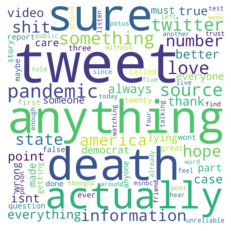

In [45]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(background_color="white",width=1920,height=1920, max_words=100,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(dict(l))
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [46]:
import re, os, glob
import pandas as pd
import feather
from collections import Counter

ftr_dir = '../all-en-ftrs/'

# Uses the json_dir variable to navigate to the dataset directory and 'get' all json files
ftr_pattern = os.path.join(ftr_dir, '*.ftr')

file_list_2 = glob.glob(ftr_pattern)

flat_list_2 = []
    
for i in file_list_2:
    print(i, len(flat_list_2))
    read_ftr = pd.read_feather(i, columns=None, use_threads=True)
    ls_2 = read_ftr["text"].tolist()

    flat_list_2 = flat_list_2 + [item for sublist in ls_2 for item in sublist]

exclude = ["you", "i", "they", "we", "trump", "me", "my", "dont", "u", "trump", "therealdonaldtrump","youre"]
top_200_2 = Counter(" ".join(flat_list_2).split()).most_common(200)

../all-en-ftrs\2020-03-25.ftr 0
../all-en-ftrs\2020-03-26.ftr 1860055
../all-en-ftrs\2020-03-27.ftr 3963883
../all-en-ftrs\2020-03-28.ftr 6137168
../all-en-ftrs\2020-03-29.ftr 8569214
../all-en-ftrs\2020-03-30.ftr 11057365
../all-en-ftrs\2020-03-31.ftr 13117882
../all-en-ftrs\2020-04-01.ftr 15458125


In [50]:
len(flat_list_2)

17659594

In [51]:
l_all = []

for k,v in top_200_2[100:]:
    if k not in stop_words and len(k) > 3:
        l_all.append((k,v))
print(l_all)

[('state', 16897), ('death', 16379), ('nothing', 16311), ('life', 16069), ('tweet', 16036), ('three', 15836), ('year', 15578), ('video', 15554), ('back', 15465), ('doesnt', 15355), ('america', 15207), ('information', 15131), ('corona', 15078), ('theorist', 14867), ('show', 14834), ('help', 14703), ('could', 14663), ('call', 14503), ('trying', 14067), ('false', 14029), ('watch', 14015), ('como', 13907), ('report', 13818), ('democrat', 13614), ('didnt', 13603), ('source', 13549), ('tell', 13357), ('true', 13321), ('isnt', 13312), ('part', 13156), ('must', 13102), ('case', 13050), ('read', 13026), ('four', 13007), ('number', 12989), ('five', 12955), ('another', 12761), ('anything', 12503), ('always', 12485), ('hate', 12470), ('saying', 12421), ('actually', 12388), ('social', 12354), ('everything', 12303), ('give', 12221), ('msnbc', 12173), ('public', 11883), ('story', 11850), ('shit', 11800), ('lying', 11696), ('everyone', 11477), ('point', 11423), ('made', 11416), ('better', 11374), ('me

In [72]:
count=0
for k,v in l_all:
    count+=v

one = 16897/count
two = 16379/count
three = 16311/count
four = 16069/count
five = 16036/count
total = one+two+three+four+five
print(total)

#8.7

0.08861187884257432


In [76]:
words_all = []
for k,v in l_all:
    words_all.append(k)

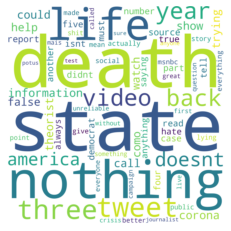

In [52]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(background_color="white",width=1920,height=1920, max_words=100,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(dict(l_all))
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [40]:
import random
def red_color_func(word, font_size, font_path, position, orientation, random_state=None):
    return "hsl(247, 100%%, %d%%)" % random.randint(40, 100)

In [53]:
ls = posTag(l_all)
counts = Counter()
for tags in ls:
    counts += Counter(tag for word, tag in tags)
print(counts)

Counter({'NN': 47, 'JJ': 6, 'RB': 4, 'CD': 3, 'VBG': 3, 'MD': 2, 'VBN': 2, 'DT': 1, 'VB': 1, 'RBR': 1, 'IN': 1})


In [54]:
ls = posTag(l)
counts = Counter()
for tags in ls:
    counts += Counter(tag for word, tag in tags)
#print(ls)
print(counts)

Counter({'NN': 49, 'RB': 7, 'JJ': 7, 'VBG': 4, 'VBN': 3, 'CD': 3, 'IN': 3, 'RBR': 1, 'MD': 1, 'DT': 1, 'VB': 1})


In [109]:
words_all
words_iso

ls = [i for i in words_all if i not in words_iso]

tokens_ls = []
counts_ls = Counter()

for w in ls:
    tokens_ls.append(nltk.pos_tag(nltk.word_tokenize(w)))

for tags in tokens_ls:
    counts_ls += Counter(tag for word, tag in tags)

print(counts_ls)

ls_2 = [i for i in words_iso if i not in words_all]

tokens_ls_2 = []
counts_ls_2 = Counter()

for w in ls_2:
    tokens_ls_2.append(nltk.pos_tag(nltk.word_tokenize(w)))

for tags in tokens_ls_2:
    counts_ls_2 += Counter(tag for word, tag in tags)

print('\n')

print(counts_ls_2)

print(len(ls_2))
print(len(ls))

print(len(words_iso))
print(len(words_all))

Counter({'NN': 33, 'JJ': 6, 'CD': 3, 'RB': 3, 'VBN': 2, 'MD': 1, 'DT': 1, 'VBG': 1, 'RBR': 1, 'IN': 1})


Counter({'NN': 27, 'VB': 6, 'RB': 6, 'JJ': 6, 'NNS': 2, 'VBG': 2, 'PRP': 1, 'IN': 1, 'MD': 1, 'CD': 1, 'VBD': 1, 'DT': 1})
55
52
74
71


In [104]:
test = [i for i in words_iso if i in ls]

print(len(ls_2))

55
